# __Final Project:__ K-Means Clustering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
# import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
#import historical stock prices data from 2015 - 2020

BBNI = pd.read_csv('BBNI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
CEKA = pd.read_csv('CEKA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DMAS = pd.read_csv('DMAS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
DVLA = pd.read_csv('DVLA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
ELSA = pd.read_csv('ELSA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
EPMT = pd.read_csv('EPMT.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDR = pd.read_csv('INDR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
INDS = pd.read_csv('INDS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
IPCC = pd.read_csv('IPCC.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
LSIP = pd.read_csv('LSIP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MBAP = pd.read_csv('MBAP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFIN = pd.read_csv('MFIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MFMI = pd.read_csv('MFMI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
MSIN = pd.read_csv('MSIN.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
NRCA = pd.read_csv('NRCA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PBID = pd.read_csv('PBID.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PGLI = pd.read_csv('PGLI.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
POWR = pd.read_csv('POWR.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PPRE = pd.read_csv('PPRE.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
PTRO = pd.read_csv('PTRO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
SCCO = pd.read_csv('SCCO.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
TPMA = pd.read_csv('TPMA.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
VINS = pd.read_csv('VINS.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)
WSBP = pd.read_csv('WSBP.JK.csv', parse_dates=['Date'], index_col='Date', dayfirst=True, infer_datetime_format=True, keep_date_col=True)

l = [BBNI, CEKA, DMAS, DVLA, ELSA, EPMT, INDR, INDS, IPCC, LSIP, MBAP, MFIN, MFMI, MSIN, NRCA, PBID, PGLI, POWR, PPRE, PTRO, SCCO, TPMA, VINS, WSBP]
stock_prices = pd.concat(l,keys= ['BBNI', 'CEKA', 'DMAS', 'DVLA', 
                                 'ELSA', 'EPMT', 'INDR', 'INDS',
                                 'IPCC', 'LSIP', 'MBAP', 'MFIN',
                                 'MFMI', 'MSIN', 'NRCA', 'PBID',
                                 'PGLI', 'POWR', 'PPRE', 'PTRO',
                                 'SCCO', 'TPMA', 'VINS', 'WSBP'],axis=0).reset_index()
stock_prices = stock_prices.drop(['Open', 'High', 'Low', 'Close','Volume'], axis=1)
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
stock_prices = stock_prices.set_index('Date', drop=True)
stock_prices = stock_prices.sort_index()
stock_prices = stock_prices.pivot_table('Adj Close', ['Date'], 'level_0')
stock_prices = stock_prices.dropna(axis=0)
# stock_prices = stock_prices.resample('D').sum()


stock_prices.head(10)

level_0,BBNI,CEKA,DMAS,DVLA,ELSA,EPMT,INDR,INDS,IPCC,LSIP,...,NRCA,PBID,PGLI,POWR,PPRE,PTRO,SCCO,TPMA,VINS,WSBP
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-08,7678.178223,888.511353,85.289276,1775.092163,360.073669,1747.283813,6426.545410,1945.394043,1460.791260,1278.141602,...,306.528564,977.284973,194.372086,899.169373,380.589966,1584.561279,9057.666992,261.107880,110.869713,371.024292
2018-08-09,7535.989258,916.569580,84.612381,1775.092163,347.081299,1563.359131,6379.636230,2027.981689,1492.646606,1243.730103,...,311.343170,973.126221,194.372086,908.251892,378.705841,1519.797241,9057.666992,257.430298,106.572433,367.439484
2018-08-10,7559.687500,963.333313,100.857964,1775.092163,354.505493,1563.359131,6285.818359,1963.746826,1492.646606,1194.570801,...,314.552887,977.284973,194.372086,894.628113,374.937653,1506.844360,9057.666992,257.430298,109.150795,372.816681
2018-08-13,7014.631836,925.922302,99.504158,1766.035645,332.232910,1563.359131,5863.636230,1881.159424,1465.342163,1160.159302,...,311.343170,964.808960,194.372086,908.251892,367.401215,1429.127441,9103.182617,246.397583,108.291344,354.892792
2018-08-14,6919.839355,944.627808,90.704475,1766.035645,324.808716,1471.396851,5722.909180,1862.806641,1456.240601,1160.159302,...,304.923737,968.967590,194.372086,908.251892,367.401215,1411.857056,9103.182617,229.848495,108.291344,344.138458
2018-08-15,6990.933594,939.951477,93.412071,1766.035645,328.520813,1471.396851,5769.818359,1963.746826,1428.936035,1302.721191,...,304.923737,973.126221,194.372086,894.628113,365.517090,1424.809937,8648.023438,239.042435,103.134605,344.138458
2018-08-16,6706.556641,963.333313,90.704475,1761.507446,321.096619,1471.396851,5722.909180,1963.746826,1383.428467,1297.805298,...,312.948029,973.126221,194.372086,881.004333,361.748871,1394.586548,8966.635742,237.203644,103.994064,342.346069
2018-08-17,6706.556641,963.333313,90.704475,1761.507446,321.096619,1471.396851,5722.909180,1963.746826,1383.428467,1297.805298,...,312.948029,973.126221,194.372086,881.004333,361.748871,1394.586548,8966.635742,237.203644,103.994064,342.346069
2018-08-20,6896.141113,958.656982,91.381371,1747.922607,324.808716,1471.396851,5699.454590,1927.041382,1374.327026,1307.637207,...,317.762604,973.126221,194.372086,881.004333,367.401215,1459.350708,9012.151367,233.526062,97.977882,353.100403


In [3]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = stock_prices.pct_change().mean() * 252
returns = pd.DataFrame(returns)
#print(returns)
returns.columns = ['Returns']
returns['Volatility'] = stock_prices.pct_change().std() * sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)
cleaned_data

array([[-0.17419895,  0.40790748],
       [ 0.54182832,  0.51449338],
       [ 0.62163359,  0.52292939],
       [ 0.16967104,  0.31960374],
       [-0.1014284 ,  0.48861518],
       [ 0.16039872,  0.50583224],
       [-0.33054739,  0.59207753],
       [ 0.1531023 ,  0.44208089],
       [-0.45777679,  0.56214542],
       [ 0.01280898,  0.53219413],
       [-0.18930134,  0.30609277],
       [ 0.14226033,  0.44162284],
       [ 0.4938144 ,  1.02388027],
       [-0.16881414,  0.44363683],
       [ 0.05544746,  0.28308341],
       [-0.01752857,  0.30879336],
       [ 0.42521064,  0.81957795],
       [-0.15234499,  0.32263467],
       [-0.25224359,  0.44791028],
       [ 0.15925304,  0.37308456],
       [ 0.0510047 ,  0.17332838],
       [ 0.30921606,  0.57302788],
       [ 0.36853088,  0.96299438],
       [-0.20930666,  0.44551053]])

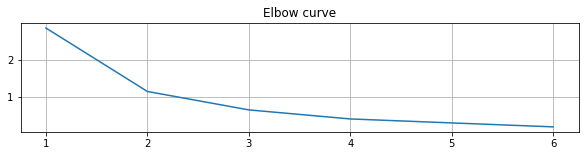

In [4]:
X = cleaned_data
#within cluster sum of squares.we calculate the sum of squares of the distance of each data point 
# in cluster k from their center point ki.
wcss = []
for k in range(1, 7):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(10, 2))
plt.plot(range(1, 7), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [5]:
#the change in slope of curve is not significant after k=5. Hence we select no. of clusters to be 3

# computing K-Means with K = 3 (3 clusters)
centroids,_ = kmeans(cleaned_data,3)
# assign each sample to a cluster
idx,_ = vq(cleaned_data,centroids)
 
data = cleaned_data

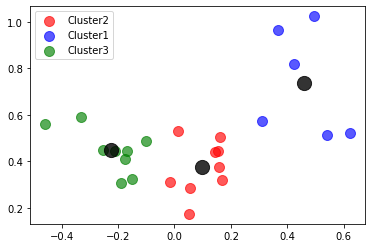

In [13]:
#using scatter plt 
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
#plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
plt.scatter(centroids[:,0],centroids[:,1],s=200, c='black', alpha = 0.8)
plt.legend()
plt.show()

In [14]:
#Finally to get the details of which stock is actually in which cluster we can run the following line 
# of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

In [15]:
labels =['Stock Symbol', 'Cluster']
df = pd.DataFrame.from_records(details, columns=labels)
df.sort_values(by='Cluster', ascending=True)

,Stock Symbol,Cluster
11,MFIN,0
14,NRCA,0
9,LSIP,0
15,PBID,0
7,INDS,0
20,SCCO,0
19,PTRO,0
3,DVLA,0
5,EPMT,0
21,TPMA,1


In [12]:
df.to_csv('KMeans_portfolio_clustering.csv', header= True)

In [16]:
df['Cluster'].value_counts()

2    9
0    9
1    6
Name: Cluster, dtype: int64